In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file
import os

import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import roc_curve, auc
import scipy
from scipy import stats
import plotly
from plotly import figure_factory as FF
from plotly.offline import *

Rawdata = pd.read_csv('datasets/games.csv')

In [2]:
df = pd.DataFrame(Rawdata)
df.head(5)

,gameId,creationTime,gameDuration,seasonId,winner,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,...,t2_towerKills,t2_inhibitorKills,t2_baronKills,t2_dragonKills,t2_riftHeraldKills,t2_ban1,t2_ban2,t2_ban3,t2_ban4,t2_ban5
0,3326086514,1504279457970,1949,9,1,2,1,1,1,1,...,5,0,0,1,1,114,67,43,16,51
1,3229566029,1497848803862,1851,9,1,1,1,1,0,1,...,2,0,0,0,0,11,67,238,51,420
2,3327363504,1504360103310,1493,9,1,2,1,1,1,2,...,2,0,0,1,0,157,238,121,57,28
3,3326856598,1504348503996,1758,9,1,1,1,1,1,1,...,0,0,0,0,0,164,18,141,40,51
4,3330080762,1504554410899,2094,9,1,2,1,1,1,1,...,3,0,0,1,0,86,11,201,122,18


In [3]:
data = df[['gameDuration', 'winner', 'firstBlood', 'firstTower', 'firstInhibitor', 'firstBaron', 'firstDragon'
         , 'firstRiftHerald', 't1_towerKills', 't1_inhibitorKills', 't1_baronKills', 't1_dragonKills', 't1_riftHeraldKills'
         , 't2_towerKills', 't2_inhibitorKills', 't2_baronKills', 't2_dragonKills', 't2_riftHeraldKills']]

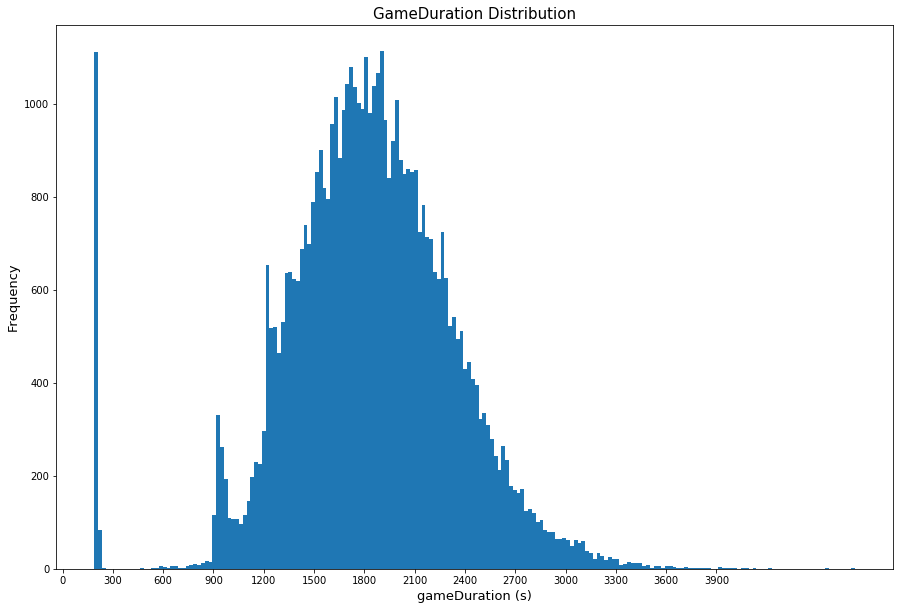

In [4]:
def pltDuration(data):
    plt.figure(figsize = (15, 10))
    Duration_plot = plt.hist(data['gameDuration'], bins = 200)
    my_x_ticks = np.arange(0, 4200, 300)
    plt.xticks(my_x_ticks)
    plt.xlabel("gameDuration (s)", fontsize = 13)
    plt.ylabel("Frequency", fontsize = 13)
    plt.title("GameDuration Distribution", fontsize = 15)
    plt.show()
pltDuration(data)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51490 entries, 0 to 51489
Data columns (total 18 columns):
gameDuration          51490 non-null int64
winner                51490 non-null int64
firstBlood            51490 non-null int64
firstTower            51490 non-null int64
firstInhibitor        51490 non-null int64
firstBaron            51490 non-null int64
firstDragon           51490 non-null int64
firstRiftHerald       51490 non-null int64
t1_towerKills         51490 non-null int64
t1_inhibitorKills     51490 non-null int64
t1_baronKills         51490 non-null int64
t1_dragonKills        51490 non-null int64
t1_riftHeraldKills    51490 non-null int64
t2_towerKills         51490 non-null int64
t2_inhibitorKills     51490 non-null int64
t2_baronKills         51490 non-null int64
t2_dragonKills        51490 non-null int64
t2_riftHeraldKills    51490 non-null int64
dtypes: int64(18)
memory usage: 7.1 MB


<class 'pandas.core.frame.DataFrame'>
Int64Index: 50181 entries, 0 to 51489
Data columns (total 18 columns):
gameDuration          50181 non-null int64
winner                50181 non-null int64
firstBlood            50181 non-null int64
firstTower            50181 non-null int64
firstInhibitor        50181 non-null int64
firstBaron            50181 non-null int64
firstDragon           50181 non-null int64
firstRiftHerald       50181 non-null int64
t1_towerKills         50181 non-null int64
t1_inhibitorKills     50181 non-null int64
t1_baronKills         50181 non-null int64
t1_dragonKills        50181 non-null int64
t1_riftHeraldKills    50181 non-null int64
t2_towerKills         50181 non-null int64
t2_inhibitorKills     50181 non-null int64
t2_baronKills         50181 non-null int64
t2_dragonKills        50181 non-null int64
t2_riftHeraldKills    50181 non-null int64
dtypes: int64(18)
memory usage: 7.3 MB


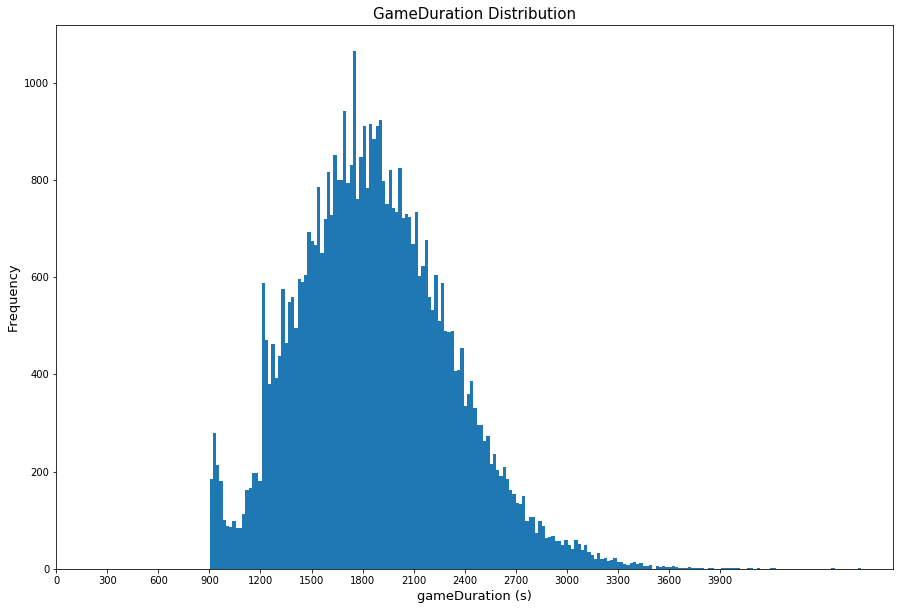

In [6]:
data = data[data['gameDuration'] >= 900]
data.info()
data.sample(5)

# plot the histgram of the selected dataset
pltDuration(data)

Hypothesis Test

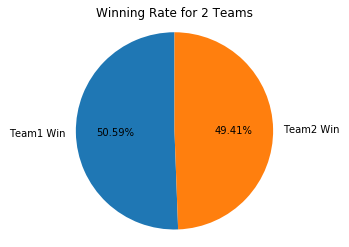

In [7]:
n = data.count()
Team1_win = data[data['winner'] == 1].count()
Team2_win = data[data['winner'] == 2].count()
Team1_win_percent = Team1_win/n * 100
Team2_win_percent = Team2_win/n * 100
T1 = Team1_win_percent['winner']
T2 = Team2_win_percent['winner']
plt.pie((T1,T2), labels = ('Team1 Win', 'Team2 Win'),
        startangle = 90, autopct='%.2f%%')
plt.axis('equal')
plt.title('Winning Rate for 2 Teams')
plt.show()

In [8]:
data['winner'].replace(2,0,inplace=True)
data.describe()

,gameDuration,winner,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,firstRiftHerald,t1_towerKills,t1_inhibitorKills,t1_baronKills,t1_dragonKills,t1_riftHeraldKills,t2_towerKills,t2_inhibitorKills,t2_baronKills,t2_dragonKills,t2_riftHeraldKills
count,50181.000000,50181.000000,50181.000000,50181.000000,50181.000000,50181.000000,50181.000000,50181.000000,50181.000000,50181.000000,50181.000000,50181.000000,50181.000000,50181.000000,50181.000000,50181.000000,50181.000000,50181.000000
mean,1873.638269,0.505889,1.487495,1.485443,1.339591,0.950679,1.479026,0.750324,5.836771,1.042207,0.381997,1.422650,0.257946,5.687989,1.009745,0.425360,1.440645,0.246189
std,448.633186,0.499970,0.499849,0.500510,0.653287,0.838741,0.528411,0.824457,3.740422,1.269932,0.588357,1.201741,0.437509,3.807070,1.262469,0.618012,1.219171,0.430794
min,901.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1556.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
50%,1847.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,0.000000,1.000000,0.000000,6.000000,0.000000,0.000000,1.000000,0.000000
75%,2157.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,9.000000,2.000000,1.000000,2.000000,1.000000,9.000000,2.000000,1.000000,2.000000,0.000000
max,4728.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,11.000000,10.000000,5.000000,6.000000,1.000000,11.000000,10.000000,4.000000,6.000000,1.000000


In [9]:
true_mu = 0.5
t_test = scipy.stats.ttest_1samp(data['winner'], true_mu)
t_value = t_test[0]
p_value = t_test[1]
print("t value: " + str(t_value) + " ,p value " + str(p_value))

t value: 2.638418111484253 ,p value 0.008331952354840945


In [10]:
scipy.stats.t.interval(0.95, len(data['winner'])-1,
                       loc=np.mean(data['winner']), scale=scipy.stats.sem(data['winner']))

(0.5015141356287768, 0.5102632303065374)

In [11]:
p_firstBlood = data[(data['firstBlood'] == 1) &
                    (data['winner'] == 1)].count()/data[data['firstBlood'] == 1].count()
p_firstTower = data[(data['firstTower'] == 1) & 
                    (data['winner'] == 1)].count()/data[data['firstTower'] == 1].count()
p_firstInhibitor = data[(data['firstInhibitor'] == 1) & 
                        (data['winner'] == 1)].count()/data[data['firstInhibitor'] == 1].count()
p_firstBaron = data[(data['firstBaron'] == 1) & 
                   (data['winner'] == 1)].count()/data[data['firstBaron'] == 1].count()
p_firstDragon = data[(data['firstDragon'] == 1) & 
                     (data['winner'] == 1)].count()/data[data['firstDragon'] == 1].count()
p_firstRiftHerald = data[(data['firstRiftHerald'] == 1) & 
                         (data['winner'] == 1)].count()/data[data['firstRiftHerald'] == 1].count()

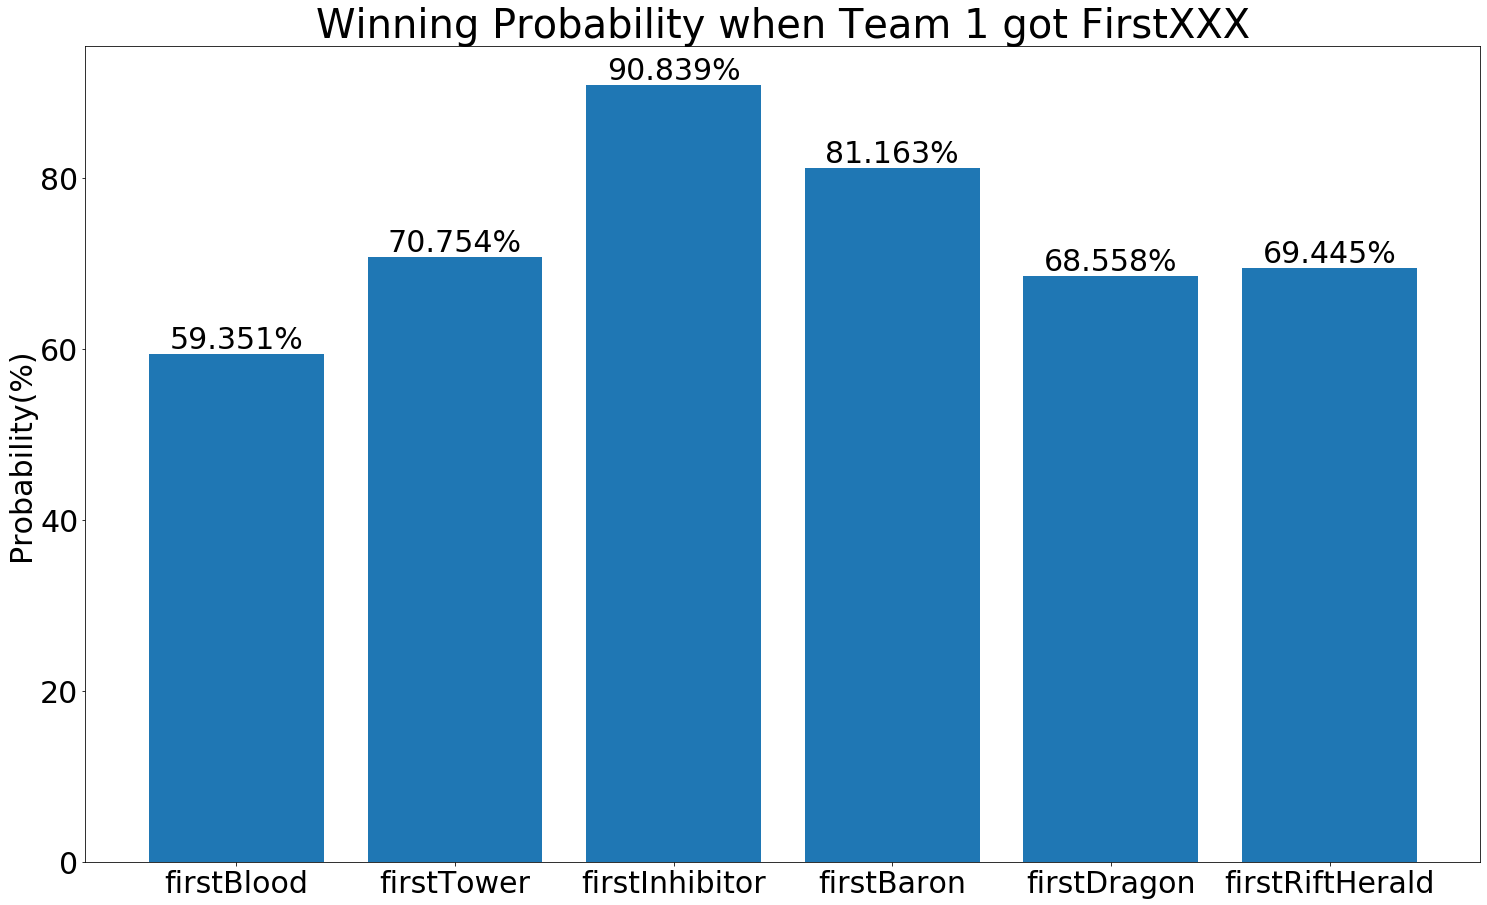

In [12]:
labels = ('firstBlood', 'firstTower', 'firstInhibitor', 'firstBaron',
          'firstDragon', 'firstRiftHerald')
probabilities = [p_firstBlood['gameDuration'], p_firstTower['gameDuration'], p_firstInhibitor['gameDuration'], p_firstBaron['gameDuration']
                ,p_firstDragon['gameDuration'] ,p_firstRiftHerald['gameDuration']]
probabilities = [i * 100 for i in probabilities]
y_pos = np.arange(len(labels))
plt.figure(figsize=(25,15))
plt.bar(y_pos, probabilities, align='center', alpha=1)
plt.xticks(y_pos, labels, fontsize = 30)
plt.yticks(fontsize = 30)
plt.ylabel('Probability(%)', fontsize = 30)
plt.title('Winning Probability when Team 1 got FirstXXX', fontsize = 40)
for a,b in zip(y_pos, probabilities):
    plt.text(a, b, '%.3f'%b + '%', ha='center', va = 'bottom', fontsize=30)
plt.show()



In [13]:
p_firstBlood1 = data[(data['firstBlood'] == 1) &
                    (data['winner'] == 1)].count()/data[data['winner'] == 1].count()
p_firstTower1 = data[(data['firstTower'] == 1) & 
                    (data['winner'] == 1)].count()/data[data['winner'] == 1].count()
p_firstInhibitor1 = data[(data['firstInhibitor'] == 1) & 
                        (data['winner'] == 1)].count()/data[data['winner'] == 1].count()
p_firstBaron1 = data[(data['firstBaron'] == 1) & 
                   (data['winner'] == 1)].count()/data[data['winner'] == 1].count()
p_firstDragon1 = data[(data['firstDragon'] == 1) & 
                     (data['winner'] == 1)].count()/data[data['winner'] == 1].count()
p_firstRiftHerald1 = data[(data['firstRiftHerald'] == 1) & 
                         (data['winner'] == 1)].count()/data[data['winner'] == 1].count()

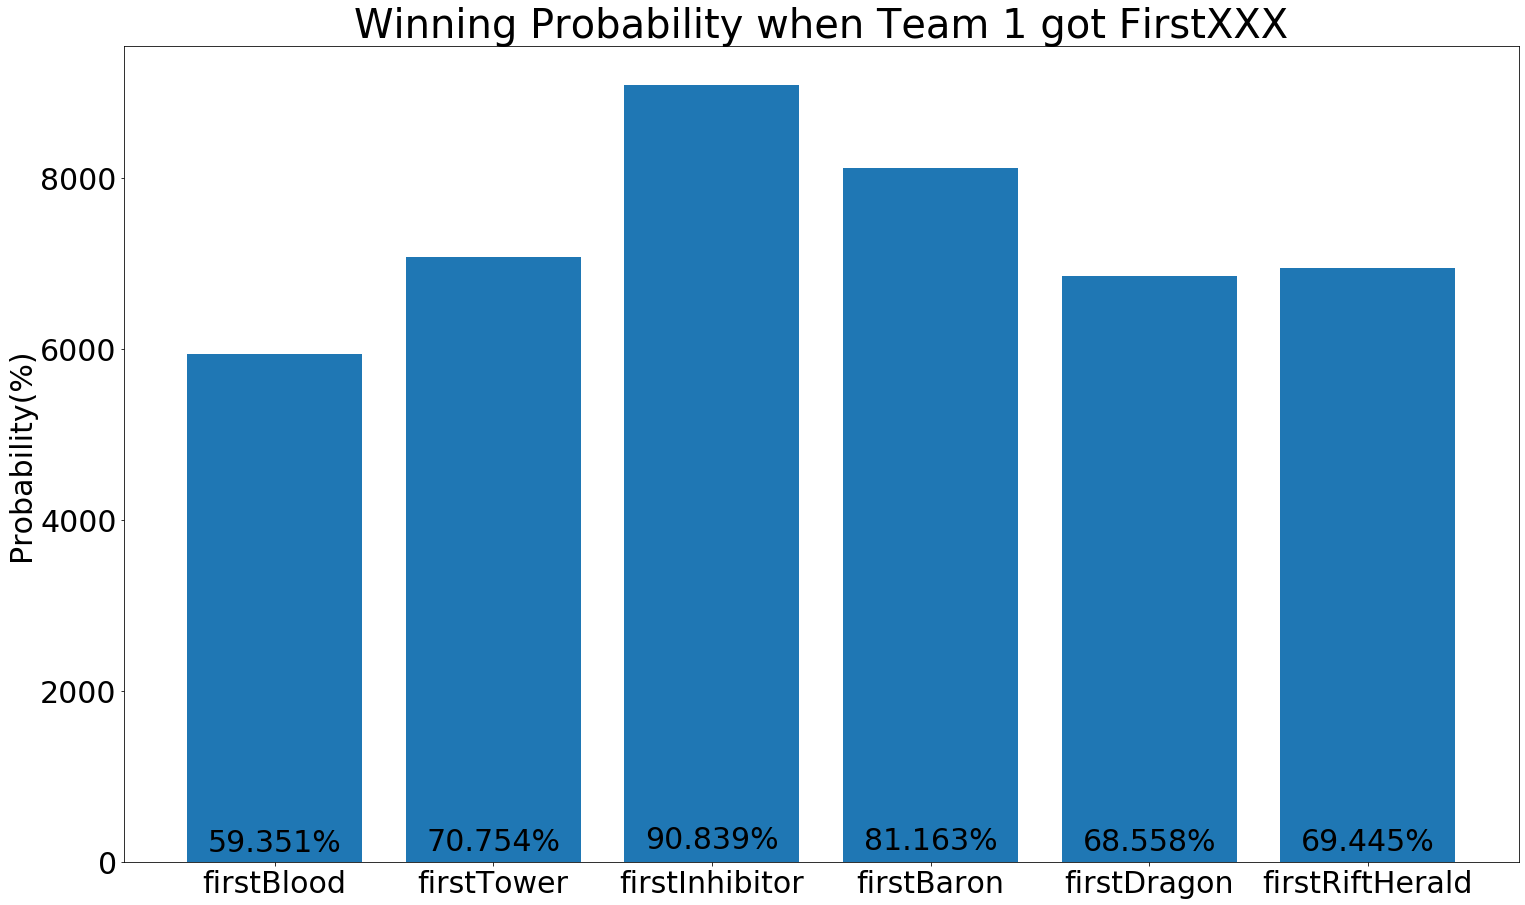

In [14]:
labels1 = ('firstBlood', 'firstTower', 'firstInhibitor', 'firstBaron',
          'firstDragon', 'firstRiftHerald')
probabilities1 = [p_firstBlood1['gameDuration'], p_firstTower1['gameDuration'], p_firstInhibitor1['gameDuration'], p_firstBaron['gameDuration']
                ,p_firstDragon1['gameDuration'] ,p_firstRiftHerald1['gameDuration']]
probabilities1 = [i * 100 for i in probabilities]
y_pos1 = np.arange(len(labels1))
plt.figure(figsize=(25,15))
plt.bar(y_pos1, probabilities1, align='center', alpha=1)
plt.xticks(y_pos, labels1, fontsize = 30)
plt.yticks(fontsize = 30)
plt.ylabel('Probability(%)', fontsize = 30)
plt.title('Winning Probability when Team 1 got FirstXXX', fontsize = 40)
for a,b in zip(y_pos, probabilities):
    plt.text(a, b, '%.3f'%b + '%', ha='center', va = 'bottom', fontsize=30)
plt.show()

## Data Forecast
Using Logistic Regression and KNN (K Nearest Neighbor).
While the first step is precessing the data to create dummy variables.

In [15]:
dummy_data = data.copy()
dummy_data = pd.concat([dummy_data,pd.get_dummies(data['firstBlood'],prefix = 'firstBlood'),
                       pd.get_dummies(data['firstTower'],prefix = 'firstTower'),
                       pd.get_dummies(data['firstInhibitor'],prefix = 'firstInhibitor'),
                       pd.get_dummies(data['firstBaron'],prefix = 'firstBaron'),
                       pd.get_dummies(data['firstDragon'],prefix = 'firstDragon'),
                       pd.get_dummies(data['firstRiftHerald'],prefix = 'firstRiftHerald')], axis = 1)
dummy_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50181 entries, 0 to 51489
Data columns (total 35 columns):
gameDuration          50181 non-null int64
winner                50181 non-null int64
firstBlood            50181 non-null int64
firstTower            50181 non-null int64
firstInhibitor        50181 non-null int64
firstBaron            50181 non-null int64
firstDragon           50181 non-null int64
firstRiftHerald       50181 non-null int64
t1_towerKills         50181 non-null int64
t1_inhibitorKills     50181 non-null int64
t1_baronKills         50181 non-null int64
t1_dragonKills        50181 non-null int64
t1_riftHeraldKills    50181 non-null int64
t2_towerKills         50181 non-null int64
t2_inhibitorKills     50181 non-null int64
t2_baronKills         50181 non-null int64
t2_dragonKills        50181 non-null int64
t2_riftHeraldKills    50181 non-null int64
firstBlood_1          50181 non-null uint8
firstBlood_2          50181 non-null uint8
firstTower_0          50181 non

In [16]:
X = dummy_data[['t1_towerKills','t1_inhibitorKills','t1_baronKills','t1_dragonKills','t1_riftHeraldKills',
                           't2_towerKills','t2_inhibitorKills','t2_baronKills','t2_dragonKills','t2_riftHeraldKills',
                           'firstBlood_1','firstTower_1','firstTower_2','firstInhibitor_1','firstInhibitor_2',
                           'firstBaron_1','firstBaron_2','firstDragon_1','firstDragon_2','firstRiftHerald_1','firstRiftHerald_2',
                           'gameDuration']]
y = dummy_data['winner']
print(X)

       t1_towerKills  t1_inhibitorKills  t1_baronKills  t1_dragonKills  \
0                 11                  1              2               3   
1                 10                  4              0               2   
2                  8                  1              1               1   
3                  9                  2              1               2   
4                  9                  2              1               3   
...              ...                ...            ...             ...   
51485              2                  0              0               0   
51486              5                  4              0               2   
51487              0                  0              0               1   
51488              0                  0              0               0   
51489             11                  3              1               2   

       t1_riftHeraldKills  t2_towerKills  t2_inhibitorKills  t2_baronKills  \
0                       0        

In [17]:
print(y)

0        1
1        1
2        1
3        1
4        1
        ..
51485    0
51486    0
51487    0
51488    0
51489    1
Name: winner, Length: 50181, dtype: int64


In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=0)

In [19]:
lr_model= LogisticRegression(C = 1.0,
                            penalty = 'l2',solver = 'liblinear')

lr_model.fit(X_train,y_train)
pred_train = lr_model.predict(X_train)
print(classification_report(y_train,pred_train > 0.5))

pred_test = lr_model.predict(X_test)
print(classification_report(y_test, pred_test > 0.5))
print(lr_model.coef_)
print(lr_model.intercept_)

              precision    recall  f1-score   support

           0       0.97      0.97      0.97     17361
           1       0.97      0.97      0.97     17765

    accuracy                           0.97     35126
   macro avg       0.97      0.97      0.97     35126
weighted avg       0.97      0.97      0.97     35126

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      7434
           1       0.97      0.97      0.97      7621

    accuracy                           0.97     15055
   macro avg       0.97      0.97      0.97     15055
weighted avg       0.97      0.97      0.97     15055

[[ 1.24922792e+00 -5.73728450e-02  7.00527501e-01  7.64101232e-03
  -9.07281444e-02 -1.30587991e+00  1.67711687e-01 -3.96356772e-01
   6.58301550e-02  3.32246305e-01 -1.98805528e-02 -5.53865076e-01
   3.47879070e-01 -4.91454977e-01  5.09268587e-01 -6.43787231e-01
  -1.47418091e-01 -1.74064938e-01 -2.69156524e-01 -9.07281444e-02
   3.32246305e-0

[[0.4469187  0.5530813 ]
 [0.27804687 0.72195313]
 [0.77403233 0.22596767]
 [0.22442268 0.77557732]
 [0.11642683 0.88357317]
 [0.01165109 0.98834891]]


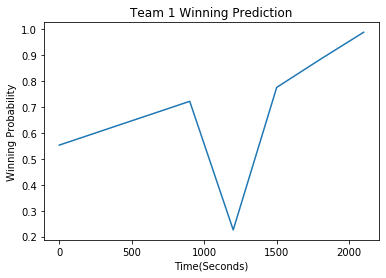

In [20]:
p = []
t = []
X1 = [[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
      [1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,900],
     [2,0,0,0,0,3,0,0,1,1,1,1,0,0,0,0,0,0,1,0,1,1200],
     [5,0,0,1,0,4,0,0,1,1,1,1,0,0,0,0,0,0,1,0,1,1500],
     [6,1,1,2,0,4,0,0,1,1,1,1,0,1,0,1,0,0,1,0,1,1800],
     [9,2,1,3,0,5,0,0,1,1,1,1,0,1,0,1,0,0,1,0,1,2100]]
pre = lr_model.predict_proba(X1)

print(pre)
for i in pre:
    p.append(i[1])
for j in X1:
    t.append(j[-1])
plt.plot(t,p)
plt.xlabel('Time(Seconds)')
plt.ylabel('Winning Probability')
plt.title('Team 1 Winning Prediction')
plt.show()

In [22]:
pred = lr_model.predict_proba(X_test)
result = pd.DataFrame(pred)
result.index=X_test.index
result.columns = ['0', 'winning_probability']
print(result.head(5))

              0  winning_probability
30840  0.000029             0.999971
5934   0.002009             0.997991
26698  0.999976             0.000024
3765   0.000365             0.999635
34702  0.999840             0.000160


In [23]:
y_score = lr_model.decision_function(X_test)
fpr, tpr, threshold = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)
print("AUC: " + str(roc_auc))

AUC: 0.9967365177644979


<Figure size 432x288 with 0 Axes>

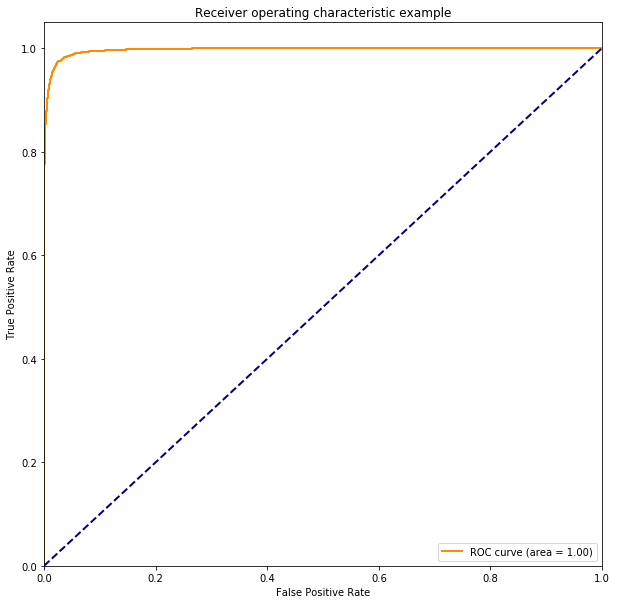

In [27]:
plt.figure()
lw = 2
plt.figure(figsize=(10,10))
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()